In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [4]:
X, y = make_classification(
    n_samples=1000, 
    n_features=2, 
    n_informative=2, 
    n_redundant=0, 
    n_repeated=0, 
    n_classes=2, 
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [6]:
def compute_loss(y, y_pred):
    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))


In [7]:
def BGD(X_train, y_train, epochs, learning_rate=0.01):
    w = np.zeros(X_train.shape[1])
    b = 0
    loss_history = []
    
    for epoch in range(epochs):
        y_pred = sigmoid(np.dot(X_train, w) + b)
        error = y_pred - y_train
        
        gradient_w = np.dot(X_train.T, error) / len(X_train)
        gradient_b = np.sum(error) / len(X_train)
        
        w -= learning_rate * gradient_w
        b -= learning_rate * gradient_b
        
        loss = compute_loss(y_train, y_pred)
        loss_history.append(loss)
        
        if epoch % 50 == 0:
            print(f"Epoch {epoch}, Loss: {loss}")
    
    return w, b, loss_history


In [8]:
def SGD(X_train, y_train, epochs, learning_rate=0.01):
    w = np.zeros(X_train.shape[1])
    b = 0
    loss_history = []
    
    for epoch in range(epochs):
        indices = np.arange(len(X_train))
        np.random.shuffle(indices)
        X_train_shuffled = X_train[indices]
        y_train_shuffled = y_train[indices]
        
        for i in range(len(X_train)):
            x_i = X_train_shuffled[i]
            y_i = y_train_shuffled[i]
            
            y_pred = sigmoid(np.dot(x_i, w) + b)
            error = y_pred - y_i
            
            gradient_w = x_i * error
            gradient_b = error
            
            w -= learning_rate * gradient_w
            b -= learning_rate * gradient_b
        
        y_pred_all = sigmoid(np.dot(X_train, w) + b)
        loss = compute_loss(y_train, y_pred_all)
        loss_history.append(loss)
        
        if epoch % 50 == 0:
            print(f"Epoch {epoch}, Loss: {loss}")
    
    return w, b, loss_history


In [9]:
def MBGD(X_train, y_train, epochs, learning_rate=0.01, batch_size=32):
    w = np.zeros(X_train.shape[1])
    b = 0
    loss_history = []
    
    for epoch in range(epochs):
        indices = np.arange(len(X_train))
        np.random.shuffle(indices)
        X_train_shuffled = X_train[indices]
        y_train_shuffled = y_train[indices]
        
        for i in range(0, len(X_train), batch_size):
            X_batch = X_train_shuffled[i:i + batch_size]
            y_batch = y_train_shuffled[i:i + batch_size]
            
            y_pred = sigmoid(np.dot(X_batch, w) + b)
            error = y_pred - y_batch
            
            gradient_w = np.dot(X_batch.T, error) / len(X_batch)
            gradient_b = np.sum(error) / len(X_batch)
            
            w -= learning_rate * gradient_w
            b -= learning_rate * gradient_b
        
        y_pred_all = sigmoid(np.dot(X_train, w) + b)
        loss = compute_loss(y_train, y_pred_all)
        loss_history.append(loss)
        
        if epoch % 50 == 0:
            print(f"Epoch {epoch}, Loss: {loss}")
    
    return w, b, loss_history


In [10]:

epochs = 1000
learning_rate = 0.01
batch_size = 32 
w_bgd, b_bgd, loss_bgd = BGD(X_train, y_train, epochs, learning_rate)
print(f"BGD Loss: {loss_bgd[-1]:.10f}")
w_sgd, b_sgd, loss_sgd = SGD(X_train, y_train, epochs, learning_rate)
print(f"SGD Loss: {loss_sgd[-1]:.10f}")
w_mbgd, b_mbgd, loss_mbgd = MBGD(X_train, y_train, epochs, learning_rate, batch_size)
print(f"MBGD Loss: {loss_mbgd[-1]:.10f}")
lr = LogisticRegression(max_iter=epochs)
lr.fit(X_train, y_train)  
y_pred_lr = lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Scikit-Learn LogisticRegression Accuracy: {accuracy_lr:.10f}")




Epoch 0, Loss: 0.6931471805599452
Epoch 50, Loss: 0.594498961921717
Epoch 100, Loss: 0.5324151978254966
Epoch 150, Loss: 0.4911400954761641
Epoch 200, Loss: 0.4622138599917796
Epoch 250, Loss: 0.4410467128080595
Epoch 300, Loss: 0.42501680780460177
Epoch 350, Loss: 0.41254092889592797
Epoch 400, Loss: 0.40261430825951633
Epoch 450, Loss: 0.3945716452407471
Epoch 500, Loss: 0.38795633862396023
Epoch 550, Loss: 0.3824453588128914
Epoch 600, Loss: 0.377804176556139
Epoch 650, Loss: 0.3738586792127029
Epoch 700, Loss: 0.37047708307905547
Epoch 750, Loss: 0.36755794118501756
Epoch 800, Loss: 0.3650219869698179
Epoch 850, Loss: 0.36280646020669133
Epoch 900, Loss: 0.36086107962018105
Epoch 950, Loss: 0.3591451324283004
BGD Loss: 0.3576539962
Epoch 0, Loss: 0.3630613708391527
Epoch 50, Loss: 0.34275086084232564
Epoch 100, Loss: 0.34271225097255337
Epoch 150, Loss: 0.3427211393851987
Epoch 200, Loss: 0.3427313956151603
Epoch 250, Loss: 0.3427044339932106
Epoch 300, Loss: 0.3428262950359333
Epo

In [11]:
def predict(X, w, b):
    return (sigmoid(np.dot(X, w) + b) >= 0.5).astype(int)


In [12]:
y_pred_bgd = predict(X_test, w_bgd, b_bgd)
y_pred_sgd = predict(X_test, w_sgd, b_sgd)
y_pred_mbgd = predict(X_test, w_mbgd, b_mbgd)

acc_bgd = accuracy_score(y_test, y_pred_bgd)
acc_sgd = accuracy_score(y_test, y_pred_sgd)
acc_mbgd = accuracy_score(y_test, y_pred_mbgd)


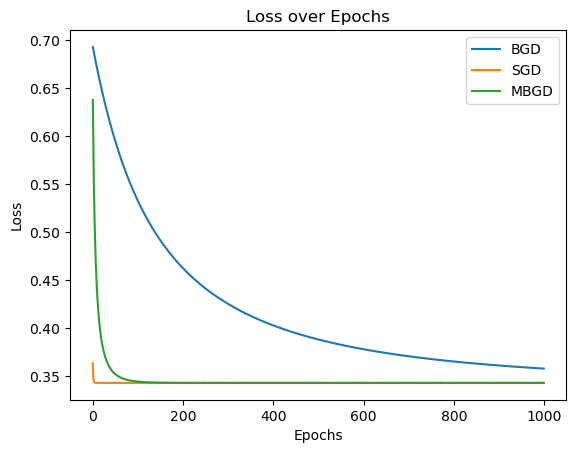

In [13]:
plt.plot(loss_bgd, label='BGD')
plt.plot(loss_sgd, label='SGD')
plt.plot(loss_mbgd, label='MBGD')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()
